# Important Transformations & Graphs for Final Jupyter Notebook

This contains what I think are my best types of transformations of the data that lead us to valuable insights. I think that you'll probably want to choose different variables to look at than I did. I was figuring out a lot of this as I went, but I think that a lot of my transformations may give you valuable insights on how you decide to do the transformations you choose.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

# Box Office Mojo

In [2]:
# Making a df from Box Office Mojo data
bom_df = pd.read_csv('../zippedData/bom.movie_gross.csv.gz')
# Looking to see if the data was read correctly
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Cleaning the comma from one of the foreign_gross points
bom_df['foreign_gross'] = bom_df['foreign_gross'].str.replace(",", "")
# and turn it into a float
bom_df['foreign_gross'] = bom_df['foreign_gross'].astype(float)

In [4]:
# Let's make the total gross column and check it out
# First we need to replace Nan with 0, so we don't lose all of our smaller films
bom_df['foreign_gross'].fillna(0, inplace=True)
# If we didn't replace those, we would lose over 1000 values
bom_df['total_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [5]:
# It's hard to make meaning out of all these 0's, let's make these numbers more readable
# We'll work with the total gross in millions, this will make the smaller observations less readable,
# but we're trying to compete in the big league. 
bom_df['total_gross(mil)'] = bom_df['total_gross'] / 1000000
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,total_gross,total_gross(mil)
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,1067.0
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09,1025.5
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08,960.3
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,828.3
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,752.6


C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\TWood\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


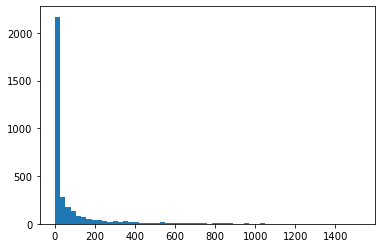

In [6]:
# First we'll set our figure name to grossing_hist
grossing_hist, ax = plt.subplots()
# Now we'll make a histogram of the data, we choose the number of bins by square root of n
ax.hist(bom_df['total_gross(mil)'], bins=round(3359**.5));

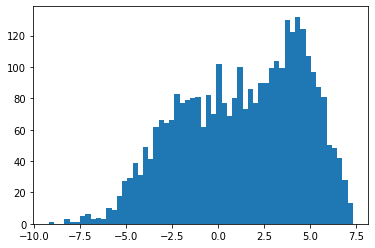

In [7]:
# As expected, we're gonna need to use a logarithmic scale to make any sense of this data
log_of_gross_hist, ax = plt.subplots()
# Here we use the numpy function, log, which will broadcast to the entire series
ax.hist(np.log(bom_df['total_gross(mil)']), bins=round(3359**.5));

This graph shows that total gross increases exponentially as quality increases. This suggests that small improvements would result in exponential improvemnt in total gross (and also that small mistakes can cause outsized amount of harm to total gross).

#  IMDB

In [8]:
# Here I'm just using your work to get directors out of the database
con = sqlite3.connect('C:/Users/TWood/Documents/FlatironMaterials/project_1/im.db')
imdb_directors = pd.read_sql("""
WITH director_names AS (
    WITH distinct_rows AS (
        SELECT
            DISTINCT movie_id, person_id
        FROM
            directors
    )
    SELECT
        p.person_id, p.primary_name, p.birth_year, p.death_year, p.primary_profession,
        distinct_rows.movie_id
    FROM
        persons as p
        INNER JOIN distinct_rows
            ON p.person_id = distinct_rows.person_id
)
SELECT 
    b.movie_id, b.primary_title, b.original_title, b.start_year, b.runtime_minutes, b.genres,
    d.person_id, d.primary_name, d.birth_year, d.death_year, d.primary_profession
FROM
    movie_basics as b
    LEFT JOIN director_names as d
        ON b.movie_id = d.movie_id
;""", con)
imdb_directors

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,nm0000080,Orson Welles,1915.0,1985.0,"actor,director,writer"
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",nm0611531,Hrishikesh Mukherjee,1922.0,2006.0,"director,editor,writer"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",nm0749914,Raoul Ruiz,1941.0,2011.0,"director,writer,producer"
...,...,...,...,...,...,...,...,...,...,...,...
169256,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,nm9272491,Ana Célia de Oliveira,NaN,NaN,"producer,director,writer"
169257,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,nm7764440,Kanchan Nayak,NaN,NaN,director
169258,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,nm10538612,Kiran Gawade,NaN,NaN,None
169259,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary,nm8349149,Vinicius Augusto Bozzo,1985.0,NaN,"writer,editor,director"


In [9]:
# I'm going to merge the numbers data with imdb to see highest grossing directors
numbers_df = pd.read_csv('../zippedData/tn.movie_budgets.csv.gz')
numbers_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [10]:
# Here is where I merge the two together
directors_gross = numbers_df.merge(imdb_directors, left_on='movie', right_on='primary_title')
# Here I clean worldwide_gross and turn it into a floating value
directors_gross['worldwide_gross'] = directors_gross['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
# Here I filter for only the highest grossing values
high_grossing = directors_gross[directors_gross['worldwide_gross'] >= 5000000]

high_grossing

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625",2.776345e+09,tt1775309,Avatar,Abatâ,2011,93.0,Horror,nm3786927,Atsushi Wada,NaN,NaN,director
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875",1.045664e+09,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,2011,136.0,"Action,Adventure,Fantasy",nm0551128,Rob Marshall,1960.0,NaN,"director,miscellaneous,producer"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350",1.497624e+08,tt6565702,Dark Phoenix,Dark Phoenix,2019,113.0,"Action,Adventure,Sci-Fi",nm1334526,Simon Kinberg,1973.0,NaN,"producer,writer,director"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868",1.403014e+09,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,2015,141.0,"Action,Adventure,Sci-Fi",nm0923736,Joss Whedon,1964.0,NaN,"writer,producer,director"
4,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482",2.048134e+09,tt4154756,Avengers: Infinity War,Avengers: Infinity War,2018,149.0,"Action,Adventure,Sci-Fi",nm0751577,Anthony Russo,1970.0,NaN,"producer,director,writer"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,16,"Oct 18, 1996",Swingers,"$200,000","$4,505,922",6.618578e+06,tt10297320,Swingers,Swingers,2019,NaN,Comedy,None,None,NaN,NaN,None
4154,16,"Oct 18, 1996",Swingers,"$200,000","$4,505,922",6.618578e+06,tt6016012,Swingers,Swingers,2016,85.0,Comedy,nm1044237,Andrejs Ekis,NaN,NaN,"producer,director,writer"
4155,16,"Oct 18, 1996",Swingers,"$200,000","$4,505,922",6.618578e+06,tt8630424,Swingers,Swingers,2018,86.0,Comedy,nm1533235,Pamela Tola,1981.0,NaN,"actress,writer,director"
4191,80,"Jul 10, 2015",The Gallows,"$100,000","$22,764,410",4.165647e+07,tt2309260,The Gallows,The Gallows,2015,81.0,"Horror,Mystery,Thriller",nm3951039,Chris Lofing,NaN,NaN,"producer,director,writer"


In [11]:
# Here, I wanted to see the highest grossing directors
# Groupby directors and then take the mean of each worldwide_gross number
Director_options = high_grossing.groupby('primary_name')['worldwide_gross'].mean()
# Then I sorted the values from highest to lowest
Director_options.sort_values(ascending=False).head(20)
# The top 4 values are bad data, not sure what happened with Mr. Wada,
# But the next 3 result from merging the wrong 2 "Titanic" movies together

primary_name
Atsushi Wada          2.776345e+09
Ravi Punj             2.208208e+09
Kevin Lincoln         2.208208e+09
Pete Meads            2.208208e+09
Colin Trevorrow       1.648855e+09
Joe Russo             1.300869e+09
Anthony Russo         1.300869e+09
Chris Buck            1.272470e+09
Chi-kin Kwok          1.272470e+09
Jennifer Lee          1.272470e+09
Adam Green            1.272470e+09
Kyle Balda            1.097532e+09
Eric Guillon          1.034728e+09
James Fotopoulos      1.025491e+09
Fernando J. Scarpa    1.025491e+09
Giuseppe Malpasso     1.025491e+09
Angus MacLane         1.021215e+09
Jared Bush            1.019430e+09
Sam Mendes            9.950740e+08
Peter Jackson         9.743160e+08
Name: worldwide_gross, dtype: float64

# Genres

In [12]:
# Here I wanted to see which genres of movie were most popular
imdb_genres = pd.read_sql("""
SELECT movie_id,
    primary_title,
    genres,
    averagerating,
    numvotes
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
;""", con)
imdb_genres

,movie_id,primary_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,None,6.6,5


In [13]:
# I wanted to see what kind of numbers the average movie gets in order to do some filtering
imdb_genres.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [14]:
# I chose to filter down to movies that get at least 10,000 votes.
# Honestly, I think a more restrictive filter would have been better, 
# This filter returned 2500ish movies
# probably best to keep it down to the top 1000 movies maybe? 

imdb_genres_refined = imdb_genres[imdb_genres['numvotes'] >= 10000]

In [15]:
# try and find all the different genres
imdb_genres['genres'].value_counts().head(50)

Drama                            11612
Documentary                      10313
Comedy                            5613
Horror                            2692
Comedy,Drama                      2617
Thriller                          1555
Drama,Romance                     1510
Comedy,Romance                    1236
Comedy,Drama,Romance              1208
Horror,Thriller                   1004
Drama,Thriller                     990
Action                             979
Romance                            717
Biography,Documentary              694
Documentary,Drama                  582
Comedy,Horror                      579
Documentary,Music                  579
Action,Crime,Drama                 562
Crime,Drama,Thriller               504
Crime,Drama                        494
Family                             491
Biography,Documentary,History      479
Drama,Family                       478
Documentary,History                476
Action,Drama                       395
Horror,Mystery,Thriller  

In [16]:
# Working with lists within dataframes is not really what pandas was made to do
# So I found a way to turn the genre data into a tabular format using booleans

# The actual code I used in the cell below was ugly, I realized later on that I should've made this a function like this
def make_genre_bool(genre):
    imdb_genres_refined[genre] =imdb_genres_refined['genres'].str.contains(genre)
# Then created a list of all the Genres above
Genre_list = ['Drama', 'Documentary', 'Comedy', 'Horror', 'Thriller', 'Romance', 'Action',\
'Biography', 'Family', 'History', 'Mystery', 'Sci-Fi', 'Crime', 'Animation', 'Adventure']
# Then looped through the list using the make_genre_bool function I made
for genre in Genre_list:
    make_genre_bool(genre)
# That should return a boolean column for every genre


<ipython-input-16-83e553010dd6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres_refined[genre] =imdb_genres_refined['genres'].str.contains(genre)


In [17]:
imdb_genres_refined

,movie_id,primary_title,genres,averagerating,numvotes,Drama,Documentary,Comedy,Horror,Thriller,Romance,Action,Biography,Family,History,Mystery,Sci-Fi,Crime,Animation,Adventure
31,tt0315642,Wazir,"Action,Crime,Drama",7.1,15378,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
41,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True
47,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True
48,tt0360556,Fahrenheit 451,"Drama,Sci-Fi,Thriller",4.9,14469,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
51,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71282,tt8632862,Fahrenheit 11/9,Documentary,6.7,11628,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
72184,tt8954732,The Princess Switch,Romance,6.0,13993,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
73206,tt9412098,Fyre,"Documentary,Music",7.3,25387,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
73304,tt9495224,Black Mirror: Bandersnatch,"Drama,Mystery,Sci-Fi",7.3,91349,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False


In [18]:
# These new columns will allow you to select specific genres
Dramas = imdb_genres_refined[imdb_genres_refined['Drama']]
Dramas.head()


,movie_id,primary_title,genres,averagerating,numvotes,Drama,Documentary,Comedy,Horror,Thriller,Romance,Action,Biography,Family,History,Mystery,Sci-Fi,Crime,Animation,Adventure
31,tt0315642,Wazir,"Action,Crime,Drama",7.1,15378,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False
41,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True
47,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True
48,tt0360556,Fahrenheit 451,"Drama,Sci-Fi,Thriller",4.9,14469,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
51,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False


In [19]:
# makes it easiest to work with when the data is as tabular as possible
imdb_genres_refined['Drama'] = imdb_genres_refined['genres'].str.contains('Drama')
imdb_genres_refined['Action'] = imdb_genres_refined['genres'].str.contains('Action')
imdb_genres_refined['Crime'] = imdb_genres_refined['genres'].str.contains('Crime')
imdb_genres_refined['Biography'] = imdb_genres_refined['genres'].str.contains('Biography')
imdb_genres_refined['Comedy'] = imdb_genres_refined['genres'].str.contains('Comedy')
imdb_genres_refined['Fantasy'] = imdb_genres_refined['genres'].str.contains('Fantasy')
imdb_genres_refined['Documentary'] = imdb_genres_refined['genres'].str.contains('Documentary')
imdb_genres_refined['Thriller'] = imdb_genres_refined['genres'].str.contains('Thriller')
imdb_genres_refined['Mystery'] = imdb_genres_refined['genres'].str.contains('Mystery')
imdb_genres_refined['Horror'] = imdb_genres_refined['genres'].str.contains('Horror')
imdb_genres_refined['Romance'] = imdb_genres_refined['genres'].str.contains('Romance')
imdb_genres_refined['Family'] = imdb_genres_refined['genres'].str.contains('Family')
imdb_genres_refined['History'] = imdb_genres_refined['genres'].str.contains('History')
imdb_genres_refined['Mystery'] = imdb_genres_refined['genres'].str.contains('Mystery')
imdb_genres_refined['Sci-Fi'] = imdb_genres_refined['genres'].str.contains('Sci-Fi')
imdb_genres_refined['Animation'] = imdb_genres_refined['genres'].str.contains('Animation')
imdb_genres_refined['Adventure'] = imdb_genres_refined['genres'].str.contains('Adventure')
# This should be enough genres to cover our bases
imdb_genres_refined

<ipython-input-19-1849f698d4d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres_refined['Drama'] = imdb_genres_refined['genres'].str.contains('Drama')
<ipython-input-19-1849f698d4d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genres_refined['Action'] = imdb_genres_refined['genres'].str.contains('Action')
<ipython-input-19-1849f698d4d7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,movie_id,primary_title,genres,averagerating,numvotes,Drama,Documentary,Comedy,Horror,Thriller,...,Action,Biography,Family,History,Mystery,Sci-Fi,Crime,Animation,Adventure,Fantasy
31,tt0315642,Wazir,"Action,Crime,Drama",7.1,15378,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
41,tt0337692,On the Road,"Adventure,Drama,Romance",6.1,37886,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
47,tt0359950,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
48,tt0360556,Fahrenheit 451,"Drama,Sci-Fi,Thriller",4.9,14469,True,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
51,tt0365907,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,True,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71282,tt8632862,Fahrenheit 11/9,Documentary,6.7,11628,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
72184,tt8954732,The Princess Switch,Romance,6.0,13993,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73206,tt9412098,Fyre,"Documentary,Music",7.3,25387,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
73304,tt9495224,Black Mirror: Bandersnatch,"Drama,Mystery,Sci-Fi",7.3,91349,True,False,False,False,False,...,False,False,False,False,True,True,False,False,False,False


In [20]:
# In the cell below is where I realized how stupid I was being
# I shouldve made a function here as well
def return_genre_mean(list_of_genres, column):
    means_list = []
    #loop through every genre from our genre list above
    for genre in list_of_genres:
        #get the mean
        mean = imdb_genres_refined[imdb_genres_refined[genre] == True][column].mean()
        #append to the list
        means_list.append(f"The mean {column} of {genre} is {mean}")
    return means_list
# Then use it
return_genre_mean(Genre_list, 'averagerating')


['The mean averagerating of Drama is 6.7600269179004036',
 'The mean averagerating of Documentary is 7.442857142857145',
 'The mean averagerating of Comedy is 6.407982261640798',
 'The mean averagerating of Horror is 5.919060773480663',
 'The mean averagerating of Thriller is 6.338684719535784',
 'The mean averagerating of Romance is 6.531067961165048',
 'The mean averagerating of Action is 6.414500683994528',
 'The mean averagerating of Biography is 7.100416666666666',
 'The mean averagerating of Family is 6.295454545454546',
 'The mean averagerating of History is 7.0872340425531934',
 'The mean averagerating of Mystery is 6.335272727272727',
 'The mean averagerating of Sci-Fi is 6.435023041474655',
 'The mean averagerating of Crime is 6.547334754797441',
 'The mean averagerating of Animation is 6.86',
 'The mean averagerating of Adventure is 6.524481327800829']

In [21]:
return_genre_mean(Genre_list, 'numvotes')

['The mean numvotes of Drama is 70460.48855989233',
 'The mean numvotes of Documentary is 22160.38961038961',
 'The mean numvotes of Comedy is 72827.54767184035',
 'The mean numvotes of Horror is 55445.914364640885',
 'The mean numvotes of Thriller is 83079.11218568665',
 'The mean numvotes of Romance is 56306.961165048546',
 'The mean numvotes of Action is 131392.2489740082',
 'The mean numvotes of Biography is 82432.73333333334',
 'The mean numvotes of Family is 87513.375',
 'The mean numvotes of History is 70546.25531914894',
 'The mean numvotes of Mystery is 83141.63636363637',
 'The mean numvotes of Sci-Fi is 192040.7926267281',
 'The mean numvotes of Crime is 77310.37313432836',
 'The mean numvotes of Animation is 102749.11428571428',
 'The mean numvotes of Adventure is 170242.6908713693']

In [22]:
# I know this is ugly, probably should've made a function, too far invested to go back now
Drama_mean = imdb_genres_refined[imdb_genres['Drama'] == True]['averagerating'].mean()
print(Drama_mean)
Documentary_mean= imdb_genres_refined[imdb_genres['Documentary'] == True]['averagerating'].mean()
print(Documentary_mean)
Comedy_mean= imdb_genres_refined[imdb_genres['Comedy'] == True]['averagerating'].mean()
print(Comedy_mean)
Horror_mean= imdb_genres[imdb_genres['Horror'] == True]['averagerating'].mean()
print(Horror_mean)
Thriller_mean= imdb_genres_refined[imdb_genres['Thriller'] == True]['averagerating'].mean()
print(Thriller_mean)
Romance_mean= imdb_genres_refined[imdb_genres['Romance'] == True]['averagerating'].mean()
print(Romance_mean)
Action_mean= imdb_genres_refined[imdb_genres['Action'] == True]['averagerating'].mean()
print(Action_mean)
Biography_mean= imdb_genres_refined[imdb_genres['Biography'] == True]['averagerating'].mean()
print(Biography_mean)
Family_mean= imdb_genres_refined[imdb_genres['Family'] == True]['averagerating'].mean()
print(Family_mean)
History_mean= imdb_genres_refined[imdb_genres['History'] == True]['averagerating'].mean()
print(History_mean)
Mystery_mean= imdb_genres_refined[imdb_genres['Mystery'] == True]['averagerating'].mean()
print(Mystery_mean)
SciFi_mean= imdb_genres_refined[imdb_genres['Sci-Fi'] == True]['averagerating'].mean()
print(SciFi_mean)
Crime_mean= imdb_genres_refined[imdb_genres['Crime'] == True]['averagerating'].mean()
print(Crime_mean)
Animation_mean= imdb_genres_refined[imdb_genres['Animation'] == True]['averagerating'].mean()
print(Animation_mean)
Adventure_mean= imdb_genres_refined[imdb_genres['Adventure'] == True]['averagerating'].mean()
print(Adventure_mean)
# Looks like Documentary, Biography, and History movies all score above a 7 on average rating
# Outside of the non-fiction films, Drama and Animation movies score the highest

KeyError: 'Drama'

In [23]:
# On second thought, I think numvotes may be more important sign of popularity
Drama_votes = imdb_genres_refined[imdb_genres['Drama'] == True]['numvotes'].mean()
print(Drama_votes)
Documentary_votes= imdb_genres_refined[imdb_genres['Documentary'] == True]['numvotes'].mean()
print(Documentary_votes)
Comedy_votes= imdb_genres_refined[imdb_genres['Comedy'] == True]['numvotes'].mean()
print(Comedy_votes)
Horror_votes= imdb_genres[imdb_genres['Horror'] == True]['numvotes'].mean()
print(Horror_votes)
Thriller_votes= imdb_genres_refined[imdb_genres['Thriller'] == True]['numvotes'].mean()
print(Thriller_votes)
Romance_votes= imdb_genres_refined[imdb_genres['Romance'] == True]['numvotes'].mean()
print(Romance_votes)
Action_votes= imdb_genres_refined[imdb_genres['Action'] == True]['numvotes'].mean()
print(Action_votes)
Biography_votes= imdb_genres_refined[imdb_genres['Biography'] == True]['numvotes'].mean()
print(Biography_votes)
Family_votes= imdb_genres_refined[imdb_genres['Family'] == True]['numvotes'].mean()
print(Family_votes)
History_votes= imdb_genres_refined[imdb_genres['History'] == True]['numvotes'].mean()
print(History_votes)
Mystery_votes= imdb_genres_refined[imdb_genres['Mystery'] == True]['numvotes'].mean()
print(Mystery_votes)
SciFi_votes= imdb_genres_refined[imdb_genres['Sci-Fi'] == True]['numvotes'].mean()
print(SciFi_votes)
Crime_votes= imdb_genres_refined[imdb_genres['Crime'] == True]['numvotes'].mean()
print(Crime_votes)
Animation_votes= imdb_genres_refined[imdb_genres['Animation'] == True]['numvotes'].mean()
print(Animation_votes)
Adventure_votes= imdb_genres_refined[imdb_genres['Adventure'] == True]['numvotes'].mean()
print(Adventure_votes)
#Action, Adventure, Animation, and Scifi all stick out now

KeyError: 'Drama'

# Popularity

In [24]:
# here I figured the popularity column would be really helpful
movie_db = pd.read_csv("../zippedData/tmdb.movies.csv.gz", index_col=[0])
movie_db

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [25]:
# combined the 2 df's so we could see the most popular movies
director_popularity = imdb_directors.merge(movie_db, left_on='primary_title', right_on='original_title', suffixes=('_imdb', '_movie'))
# specifically chose popular movies to be ones where popularity was over 20
popular_movies = director_popularity[director_popularity['popularity'] >= 20]
popular_movies

,movie_id,primary_title,original_title_imdb,start_year,runtime_minutes,genres,person_id,primary_name,birth_year,death_year,primary_profession,genre_ids,id,original_language,original_title_movie,popularity,release_date,title,vote_average,vote_count
29,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",nm1119880,Colin Trevorrow,1976.0,NaN,"writer,producer,director","[28, 12, 878, 53]",135397,en,Jurassic World,20.709,2015-06-12,Jurassic World,6.6,14056
42,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",nm0397174,Byron Howard,1968.0,NaN,"animation_department,director,actor","[16, 10751]",38757,en,Tangled,21.511,2010-11-24,Tangled,7.5,6407
43,tt0398286,Tangled,Tangled,2010,100.0,"Adventure,Animation,Comedy",nm1977355,Nathan Greno,1975.0,NaN,"actor,art_department,director","[16, 10751]",38757,en,Tangled,21.511,2010-11-24,Tangled,7.5,6407
65,tt0435761,Toy Story 3,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",nm0881279,Lee Unkrich,1967.0,NaN,"editorial_department,editor,miscellaneous","[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
84,tt0451279,Wonder Woman,Wonder Woman,2017,141.0,"Action,Adventure,Fantasy",nm0420941,Patty Jenkins,1971.0,NaN,"director,writer,producer","[12, 14, 10752, 10749]",297762,en,Wonder Woman,31.618,2017-06-02,Wonder Woman,7.3,12566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23912,tt7040874,A Simple Favor,A Simple Favor,2018,117.0,"Comedy,Crime,Drama",nm0082450,Paul Feig,1962.0,NaN,"actor,producer,director","[53, 80, 9648, 35, 18]",484247,en,A Simple Favor,21.121,2018-09-14,A Simple Favor,6.6,1756
24197,tt7349662,BlacKkKlansman,BlacKkKlansman,2018,135.0,"Biography,Crime,Drama",nm0000490,Spike Lee,1957.0,NaN,"director,producer,writer","[80, 18]",487558,en,BlacKkKlansman,25.101,2018-07-30,BlacKkKlansman,7.6,3138
24218,tt7401588,Instant Family,Instant Family,2018,118.0,"Comedy,Drama",nm1890845,Sean Anders,NaN,NaN,"writer,director,producer","[35, 18]",491418,en,Instant Family,22.634,2018-11-16,Instant Family,7.6,782
24349,tt7668870,Searching,Searching,2018,102.0,"Drama,Mystery,Thriller",nm3792134,Aneesh Chaganty,NaN,NaN,"writer,director,editor","[53, 9648, 18]",489999,en,Searching,23.660,2018-08-24,Searching,7.6,1502


In [26]:
# here, I wanted to see the directors that showed up the most in movies with popularity over 20
popular_movies['primary_name'].value_counts().head(30)

Denis Villeneuve         6
Ridley Scott             6
David Yates              5
Zack Snyder              4
Christopher Nolan        4
Quentin Tarantino        3
Bryan Singer             3
Rich Moore               3
Jon Favreau              3
Matthew Vaughn           3
Peter Jackson            3
David Leitch             3
Jake Kasdan              3
Antoine Fuqua            3
Lee Unkrich              3
Gareth Edwards           3
Chad Stahelski           2
Ramiro Medina Flores     2
Sam Mendes               2
Lenny Abrahamson         2
Alan Taylor              2
Peyton Reed              2
Alfonso Cuarón           2
Marc Webb                2
Stephen Chbosky          2
Anthony Russo            2
Guillermo del Toro       2
Mel Gibson               2
Christopher McQuarrie    2
Michael Gracey           2
Name: primary_name, dtype: int64

# Actors and Actresses

In [27]:
# tried to make actor actresses data frame, but ran into problem when people were more than
# just an actor or actress, it excluded them from the data, go down to output 31
# for my solution to this problem
actors_actresses = pd.read_sql("""
SELECT person_id,
    movie_id,
    primary_name,
    primary_profession
FROM known_for
JOIN persons
    USING(person_id)
WHERE primary_profession = 'actress' OR primary_profession = 'actor'
;""", con)

In [28]:
popular_actors = popular_movies.merge(actors_actresses, on='movie_id', suffixes=('_director', '_thespian'))

In [29]:
popular_actors['primary_name_thespian'].value_counts().head(25)

Florence Kasumba     6
Jacob Tremblay       5
Bern Collaço         5
Henry Cavill         5
Michael Stuhlbarg    4
Guy Henry            4
Paris Moletti        4
Genesis Rodriguez    4
Francis Magee        4
Dilyana Bouklieva    4
Andy Bornman         4
Rebecca Jimenez      4
Marcos Cano          4
Madison Vollmer      4
Isaac Andrews        4
Abhishek Mehta       4
Hermione Corfield    4
Kieron Elliott       3
Michael Nardone      3
Corey Hawkins        3
Joaquín Cosio        3
Thomas Sadoski       3
Greta Lee            3
Madison Iseman       3
Pom Klementieff      3
Name: primary_name_thespian, dtype: int64

In [30]:
pd.read_sql("""
WITH director_names AS (
    WITH distinct_rows AS (
        SELECT
            DISTINCT movie_id, person_id
        FROM
            directors
    )
    SELECT
        p.person_id, p.primary_name, p.birth_year, p.death_year, p.primary_profession,
        distinct_rows.movie_id
    FROM
        persons as p
        INNER JOIN distinct_rows
            ON p.person_id = distinct_rows.person_id
)
SELECT 
    b.movie_id, b.primary_title, b.original_title, b.start_year, b.runtime_minutes, b.genres,
    d.person_id, d.primary_name, d.birth_year, d.death_year, d.primary_profession
FROM
    movie_basics as b
    LEFT JOIN director_names as d
        ON b.movie_id = d.movie_id
;""")

TypeError: read_sql() missing 1 required positional argument: 'con'

In [31]:
# Here I include all people from known_for
thespian_test_2 = pd.read_sql("""
SELECT person_id,
    movie_id,
    primary_name,
    primary_profession
FROM known_for
JOIN persons
    USING(person_id)
;""", con)
thespian_test_2

,person_id,movie_id,primary_name,primary_profession
0,nm0061671,tt0837562,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
1,nm0061671,tt2398241,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
2,nm0061671,tt0844471,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
3,nm0061671,tt0118553,Mary Ellen Bauder,"miscellaneous,production_manager,producer"
4,nm0061865,tt0896534,Joseph Bauer,"composer,music_department,sound_department"
...,...,...,...,...
1638255,nm9990690,tt9090932,Joo Yeon So,actress
1638256,nm9990690,tt8737130,Joo Yeon So,actress
1638257,nm9991320,tt8734436,Madeline Smith,actress
1638258,nm9991320,tt9615610,Madeline Smith,actress


In [32]:
#then I drop the Nan values
thespian_test_2.dropna(subset=['primary_profession'], inplace=True)

In [33]:
#use str.contains('actor') to get back ALL of the actors
thespian_test_2_actors = thespian_test_2[thespian_test_2['primary_profession'].str.contains('actor')]
thespian_test_2_actors

,person_id,movie_id,primary_name,primary_profession
8,nm0062070,tt1470654,Bruce Baum,"miscellaneous,actor,writer"
9,nm0062070,tt0363631,Bruce Baum,"miscellaneous,actor,writer"
10,nm0062070,tt0104030,Bruce Baum,"miscellaneous,actor,writer"
11,nm0062070,tt0102898,Bruce Baum,"miscellaneous,actor,writer"
24,nm0063198,tt6579724,Bayou,actor
...,...,...,...,...
1638231,nm9969409,tt8559614,Robert Jones,"actor,composer"
1638243,nm9983906,tt8722030,Alejandro Odom,actor
1638244,nm9985838,tt8028908,Anthony Simonetti,actor
1638249,nm9989840,tt5953804,Mariya Shekaturova,actor


In [34]:
#do the same for the actresses
thespian_test_2_actresses = thespian_test_2[thespian_test_2['primary_profession'].str.contains('actress')]
thespian_test_2_actresses

,person_id,movie_id,primary_name,primary_profession
34,nm0063750,tt0404826,Lindsay Beamish,"actress,miscellaneous"
35,nm0063750,tt0111756,Lindsay Beamish,"actress,miscellaneous"
36,nm0063750,tt0367027,Lindsay Beamish,"actress,miscellaneous"
37,nm0063750,tt1492842,Lindsay Beamish,"actress,miscellaneous"
74,nm0067845,tt0114103,Sondos Belhassen,actress
...,...,...,...,...
1638253,nm9989854,tt8894778,Layla Louise,"actress,stunts"
1638255,nm9990690,tt9090932,Joo Yeon So,actress
1638256,nm9990690,tt8737130,Joo Yeon So,actress
1638257,nm9991320,tt8734436,Madeline Smith,actress


In [35]:
#now I look at the top choices for actors who show up most in popular movies
actor_choices = popular_movies.merge(thespian_test_2_actors, on='movie_id', suffixes=('_director', '_actor'))
actor_choices['primary_name_actor'].value_counts().head(50)

Benedict Wong                   7
Sam Hargrave                    6
Doug Mallette                   6
Nathan Greno                    6
Phil Johnston                   6
Roy Conli                       6
Josh Gad                        5
Tom Holland                     5
Daniel Kaluuya                  5
Daniel Gerson                   5
Mathew Harte                    5
Dennis Keiffer                  5
Damian Farrell                  5
Byron Howard                    5
T.J. Miller                     5
Michael Koltes                  5
Chadwick Boseman                5
Jacob Tremblay                  5
Henry Cavill                    5
Lee Admassie                    5
Bern Collaço                    5
Goran D. Kleut                  5
John DiMaggio                   5
Julian Stone                    5
Robert Nairne                   5
Adam Brown                      5
Gui DaSilva-Greene              5
Dee Tails                       5
Derek Arnold                    5
Leon Sua      

In [38]:
#and do the same for actresses
actress_choices = popular_movies.merge(thespian_test_2_actresses, on='movie_id', suffixes=('_director', '_actress'))
actress_choices['primary_name_actress'].value_counts().head(50)

Josie Trinidad               10
Tamara Khalaf                 6
Florence Kasumba              6
Karen Ann Ryan                6
Marie Tricart                 5
Katie Hooten                  5
Elizabeth Olsen               5
Elizabeth Knowelden           4
Katie Lowes                   4
Genesis Rodriguez             4
Mackenzie Davis               4
Valeria Maldonado             4
Ruth Livier                   4
Natalia Lafourcade            4
Selene Luna                   4
Cerris Morgan-Moyer           4
Melissa Santos                4
Rebecca Jimenez               4
Madison Vollmer               4
Danya Bateman                 4
Karen Huie                    4
Renee Victor                  4
Georgia Somary                4
Sofía Espinosa                4
Katherine Waterston           4
Amanda Silver                 4
Elísabet Ronaldsdóttir        4
Idina Menzel                  4
Cailee Spaeny                 4
Dilyana Bouklieva             4
Jeanette Branch               4
Alanna U